In [1]:
import pandas as pd
import numpy as np

In [2]:
data_path = './MLB/'
usage = ['train', 'test', 'validation']
label = ['pos', 'neg']

for u in usage:
    for l in label:
        name = u+'_'+l
        with open(data_path+name+'.fasta', 'r') as fp:
            lines = fp.readlines()
            # Zip key and value together
            data = []
            for pair in zip(lines[0::2], lines[1::2]):
                data.append([pair[0][1:-1], pair[1][:-1]])
            df = pd.DataFrame(data,columns=['id','protein'])
            df.to_csv(data_path+name+'.csv', index=False)
            print(u,l)
            print(df)

train pos
          id                                            protein
0    AP00085                  SLFSLIKAGAKFLGKNLLKQGACYAACKASKQC
1    AP00652                       GIMDTVKNVAKNLAGQLLDKLKCKITAC
2    AP00714              GYGCPFNQYQCHSHCSGIRGYKGGYCKGTFKQTCKCY
3    AP00269                          LSCKRGTCHFGRCPSHLIKGSCSGG
4    AP00765     MHDFWVLWVLLEYIYNSACSVLSATSSVSSRVLNRSLQVKVVKITN
5    AP01325    QPFIPRPIDTCRLRNGICFPGICRRPYYWIGTCNNGIGSCCARGWRS
6    AP02409                               AIFIFIRWLLKLGHHGRAPP
7    AP00263                         GLLQTIKEKLESLESLAKGIVSGIQA
8    AP02481                            GIGKFLHSAGKFGKAFIGEIMKS
9    AP00613                      RVKRFWPLVPVAINTVAAGINLYKAIRRK
10   AP02546  KDGYLVGNDGCKYSCFTRPGTYCANECSRVKGKDGYCYAWMACYCY...
11   AP01449                               FLGAIAAALPHVINAVTNAL
12   AP02359                             ITSHSLCTPGCAKTGSFNSFCC
13   AP01652  LIDHLGAPRWAVDTILGAIAVGNLASWVLALVPGPGWAVKAGLATA...
14   AP00452                  

test neg
                  id                                            protein
0    UniRef50_Q9BRA0                                    NVILGSAQEFLKPSD
1    UniRef50_Q54JQ2  PKENPFLPIDTTIKAPQDHSIHIPKEVYNNNGVKVYHSLDHRFNSP...
2    UniRef50_E0RTD9       DGILTRGGTILGTSREKPFKPDPGEKDSEAGSRKVEAIIENYHK
3    UniRef50_Q9H869                                 SAPVPKVMMPSPASSMFR
4    UniRef50_A0LHL6       VSVDDCARISRVVGDLLDVADIIHYPYHLEVSSPGLNRPLRKRE
5    UniRef50_B1ZSW3                        CKADSSHAHCQIVNDCCNTPSPVHATC
6    UniRef50_Q54Z01                        GMNVHIIDKDPNNFVSELQDISKAPKP
7    UniRef50_B0S0Y8                   NKLSLTRRQARAFSRVFFSGASNQEIDKQGRF
8    UniRef50_Q9FKB0                    ELIDRCIGSKIWVIMKGDKELVGILKGFDVY
9    UniRef50_Q9BVJ7                      VDEANARGEAVGVHCALGFGRTGTMLACY
10   UniRef50_P62314                   ITGVDVSMNTHLKAVKMTLKNREPVQLETLSI
11   UniRef50_P46781                                 GGRPGRVKRKNAKKGQGG
12   UniRef50_Q9Y6F1             IYFASENSKSAGYVIGMKCGAH

In [13]:
def generate_df(name):
    df_p = pd.read_csv(data_path+name+'_pos.csv')
    df_p['y'] = 1
    df_n = pd.read_csv(data_path+name+'_neg.csv')
    df_n['y'] = 0
    df = pd.concat([df_p, df_n], ignore_index=True)
    return df

def generate_vector(df):
    sequence = "ACDEFGHIKLMNPQRSTVWY"
    protein_vects=[]
    for index, sample in df.iterrows():
        vect = [sequence.index(x)+1 for x in sample['protein']]
        vect.extend([0] * (200-len(vect)))
        protein_vects.append(vect)
    return protein_vects

train = generate_df('train')
train['protein_vect'] = generate_vector(train)
train_x = pd.DataFrame(x for x in train['protein_vect'])
test = generate_df('test')
test['protein_vect'] = generate_vector(test)
test_x = pd.DataFrame(x for x in test['protein_vect'])
valid = generate_df('validation')
valid['protein_vect'] = generate_vector(valid)
valid_x = pd.DataFrame(x for x in valid['protein_vect'])

In [29]:
classifier = fuzzyKNN(k=20, m=5)
classifier.fit(train_x, train['y'])

Start Generate sample  0  membership
Start Generate sample  1  membership
Start Generate sample  2  membership
Start Generate sample  3  membership
Start Generate sample  4  membership
Start Generate sample  5  membership
Start Generate sample  6  membership
Start Generate sample  7  membership
Start Generate sample  8  membership
Start Generate sample  9  membership
Start Generate sample  10  membership
Start Generate sample  11  membership
Start Generate sample  12  membership
Start Generate sample  13  membership
Start Generate sample  14  membership
Start Generate sample  15  membership
Start Generate sample  16  membership
Start Generate sample  17  membership
Start Generate sample  18  membership
Start Generate sample  19  membership
Start Generate sample  20  membership
Start Generate sample  21  membership
Start Generate sample  22  membership
Start Generate sample  23  membership
Start Generate sample  24  membership
Start Generate sample  25  membership
Start Generate sample 

Start Generate sample  221  membership
Start Generate sample  222  membership
Start Generate sample  223  membership
Start Generate sample  224  membership
Start Generate sample  225  membership
Start Generate sample  226  membership
Start Generate sample  227  membership
Start Generate sample  228  membership
Start Generate sample  229  membership
Start Generate sample  230  membership
Start Generate sample  231  membership
Start Generate sample  232  membership
Start Generate sample  233  membership
Start Generate sample  234  membership
Start Generate sample  235  membership
Start Generate sample  236  membership
Start Generate sample  237  membership
Start Generate sample  238  membership
Start Generate sample  239  membership
Start Generate sample  240  membership
Start Generate sample  241  membership
Start Generate sample  242  membership
Start Generate sample  243  membership
Start Generate sample  244  membership
Start Generate sample  245  membership
Start Generate sample  24

Start Generate sample  438  membership
Start Generate sample  439  membership
Start Generate sample  440  membership
Start Generate sample  441  membership
Start Generate sample  442  membership
Start Generate sample  443  membership
Start Generate sample  444  membership
Start Generate sample  445  membership
Start Generate sample  446  membership
Start Generate sample  447  membership
Start Generate sample  448  membership
Start Generate sample  449  membership
Start Generate sample  450  membership
Start Generate sample  451  membership
Start Generate sample  452  membership
Start Generate sample  453  membership
Start Generate sample  454  membership
Start Generate sample  455  membership
Start Generate sample  456  membership
Start Generate sample  457  membership
Start Generate sample  458  membership
Start Generate sample  459  membership
Start Generate sample  460  membership
Start Generate sample  461  membership
Start Generate sample  462  membership
Start Generate sample  46

Start Generate sample  656  membership
Start Generate sample  657  membership
Start Generate sample  658  membership
Start Generate sample  659  membership
Start Generate sample  660  membership
Start Generate sample  661  membership
Start Generate sample  662  membership
Start Generate sample  663  membership
Start Generate sample  664  membership
Start Generate sample  665  membership
Start Generate sample  666  membership
Start Generate sample  667  membership
Start Generate sample  668  membership
Start Generate sample  669  membership
Start Generate sample  670  membership
Start Generate sample  671  membership
Start Generate sample  672  membership
Start Generate sample  673  membership
Start Generate sample  674  membership
Start Generate sample  675  membership
Start Generate sample  676  membership
Start Generate sample  677  membership
Start Generate sample  678  membership
Start Generate sample  679  membership
Start Generate sample  680  membership
Start Generate sample  68

Start Generate sample  873  membership
Start Generate sample  874  membership
Start Generate sample  875  membership
Start Generate sample  876  membership
Start Generate sample  877  membership
Start Generate sample  878  membership
Start Generate sample  879  membership
Start Generate sample  880  membership
Start Generate sample  881  membership
Start Generate sample  882  membership
Start Generate sample  883  membership
Start Generate sample  884  membership
Start Generate sample  885  membership
Start Generate sample  886  membership
Start Generate sample  887  membership
Start Generate sample  888  membership
Start Generate sample  889  membership
Start Generate sample  890  membership
Start Generate sample  891  membership
Start Generate sample  892  membership
Start Generate sample  893  membership
Start Generate sample  894  membership
Start Generate sample  895  membership
Start Generate sample  896  membership
Start Generate sample  897  membership
Start Generate sample  89

Start Generate sample  1091  membership
Start Generate sample  1092  membership
Start Generate sample  1093  membership
Start Generate sample  1094  membership
Start Generate sample  1095  membership
Start Generate sample  1096  membership
Start Generate sample  1097  membership
Start Generate sample  1098  membership
Start Generate sample  1099  membership
Start Generate sample  1100  membership
Start Generate sample  1101  membership
Start Generate sample  1102  membership
Start Generate sample  1103  membership
Start Generate sample  1104  membership
Start Generate sample  1105  membership
Start Generate sample  1106  membership
Start Generate sample  1107  membership
Start Generate sample  1108  membership
Start Generate sample  1109  membership
Start Generate sample  1110  membership
Start Generate sample  1111  membership
Start Generate sample  1112  membership
Start Generate sample  1113  membership
Start Generate sample  1114  membership
Start Generate sample  1115  membership


Start Generate sample  1305  membership
Start Generate sample  1306  membership
Start Generate sample  1307  membership
Start Generate sample  1308  membership
Start Generate sample  1309  membership
Start Generate sample  1310  membership
Start Generate sample  1311  membership
Start Generate sample  1312  membership
Start Generate sample  1313  membership
Start Generate sample  1314  membership
Start Generate sample  1315  membership
Start Generate sample  1316  membership
Start Generate sample  1317  membership
Start Generate sample  1318  membership
Start Generate sample  1319  membership
Start Generate sample  1320  membership
Start Generate sample  1321  membership
Start Generate sample  1322  membership
Start Generate sample  1323  membership
Start Generate sample  1324  membership
Start Generate sample  1325  membership
Start Generate sample  1326  membership
Start Generate sample  1327  membership
Start Generate sample  1328  membership
Start Generate sample  1329  membership


In [30]:
sol= classifier.predict(test_x)
np.mean(sol==test['y'])

Predict  0 th sample
Predict  1 th sample
Predict  2 th sample
Predict  3 th sample
Predict  4 th sample
Predict  5 th sample
Predict  6 th sample
Predict  7 th sample
Predict  8 th sample
Predict  9 th sample
Predict  10 th sample
Predict  11 th sample
Predict  12 th sample
Predict  13 th sample
Predict  14 th sample
Predict  15 th sample
Predict  16 th sample
Predict  17 th sample
Predict  18 th sample
Predict  19 th sample
Predict  20 th sample
Predict  21 th sample
Predict  22 th sample
Predict  23 th sample
Predict  24 th sample
Predict  25 th sample
Predict  26 th sample
Predict  27 th sample
Predict  28 th sample
Predict  29 th sample
Predict  30 th sample
Predict  31 th sample
Predict  32 th sample
Predict  33 th sample
Predict  34 th sample
Predict  35 th sample
Predict  36 th sample
Predict  37 th sample
Predict  38 th sample
Predict  39 th sample
Predict  40 th sample
Predict  41 th sample
Predict  42 th sample
Predict  43 th sample
Predict  44 th sample
Predict  45 th sampl

Predict  364 th sample
Predict  365 th sample
Predict  366 th sample
Predict  367 th sample
Predict  368 th sample
Predict  369 th sample
Predict  370 th sample
Predict  371 th sample
Predict  372 th sample
Predict  373 th sample
Predict  374 th sample
Predict  375 th sample
Predict  376 th sample
Predict  377 th sample
Predict  378 th sample
Predict  379 th sample
Predict  380 th sample
Predict  381 th sample
Predict  382 th sample
Predict  383 th sample
Predict  384 th sample
Predict  385 th sample
Predict  386 th sample
Predict  387 th sample
Predict  388 th sample
Predict  389 th sample
Predict  390 th sample
Predict  391 th sample
Predict  392 th sample
Predict  393 th sample
Predict  394 th sample
Predict  395 th sample
Predict  396 th sample
Predict  397 th sample
Predict  398 th sample
Predict  399 th sample
Predict  400 th sample
Predict  401 th sample
Predict  402 th sample
Predict  403 th sample
Predict  404 th sample
Predict  405 th sample
Predict  406 th sample
Predict  40

Predict  723 th sample
Predict  724 th sample
Predict  725 th sample
Predict  726 th sample
Predict  727 th sample
Predict  728 th sample
Predict  729 th sample
Predict  730 th sample
Predict  731 th sample
Predict  732 th sample
Predict  733 th sample
Predict  734 th sample
Predict  735 th sample
Predict  736 th sample
Predict  737 th sample
Predict  738 th sample
Predict  739 th sample
Predict  740 th sample
Predict  741 th sample
Predict  742 th sample
Predict  743 th sample
Predict  744 th sample
Predict  745 th sample
Predict  746 th sample
Predict  747 th sample
Predict  748 th sample
Predict  749 th sample
Predict  750 th sample
Predict  751 th sample
Predict  752 th sample
Predict  753 th sample
Predict  754 th sample
Predict  755 th sample
Predict  756 th sample
Predict  757 th sample
Predict  758 th sample
Predict  759 th sample
Predict  760 th sample
Predict  761 th sample
Predict  762 th sample
Predict  763 th sample
Predict  764 th sample
Predict  765 th sample
Predict  76

Predict  1082 th sample
Predict  1083 th sample
Predict  1084 th sample
Predict  1085 th sample
Predict  1086 th sample
Predict  1087 th sample
Predict  1088 th sample
Predict  1089 th sample
Predict  1090 th sample
Predict  1091 th sample
Predict  1092 th sample
Predict  1093 th sample
Predict  1094 th sample
Predict  1095 th sample
Predict  1096 th sample
Predict  1097 th sample
Predict  1098 th sample
Predict  1099 th sample
Predict  1100 th sample
Predict  1101 th sample
Predict  1102 th sample
Predict  1103 th sample
Predict  1104 th sample
Predict  1105 th sample
Predict  1106 th sample
Predict  1107 th sample
Predict  1108 th sample
Predict  1109 th sample
Predict  1110 th sample
Predict  1111 th sample
Predict  1112 th sample
Predict  1113 th sample
Predict  1114 th sample
Predict  1115 th sample
Predict  1116 th sample
Predict  1117 th sample
Predict  1118 th sample
Predict  1119 th sample
Predict  1120 th sample
Predict  1121 th sample
Predict  1122 th sample
Predict  1123 th

0.538623595505618

In [28]:
class fuzzyKNN():
    def __init__(self, k=10, m=2, plot=False):
        self.k = k
        self.plot = plot
        self.m = m
        
        if type(self.k) != int:
            raise Exception('"k" should have type int')
        elif type(self.plot) != bool:
            raise Exception('"plot" should have type bool')
    
    # Fit data to the model        
    def fit(self, X, Y):
        
        # Check data type. X and Y must be data frame
        if type(X) != pd.core.frame.DataFrame or type(Y) != pd.core.series.Series:
            raise Exception('X should be pandas dataframe and Y should be 1D pandas series')
        
        self.X = X
        self.Y = Y
        
        self.df = X.copy()
        self.df['Y'] = Y
        
        self.dim = len(X.columns)
        self.n = len(Y)
        
        classes = list(set(Y))
        classes.sort()
        self.classes = classes
        
        self.df['membership'] = self.cal_membership()
       
    # Predict
    def predict(self, new_x):
        if type(new_x) != pd.core.frame.DataFrame:
            raise Exception('X should be pandas dataframe.')

        pred = []
        for index, x in new_x.iterrows():
            print('Predict ',index,'th sample')
            # Get k neighbor
            k_neighbor = self.get_KNN(x.to_numpy(), self.df.copy())
            
            # Get memberships
            memberships = []
            for i in self.classes:
                
                den = 0
                num = 0
                for j in range(self.k):
                    dist = k_neighbor['distance'].iloc[j]
                    if dist != 0:
                        den = den + 1 / dist**(2/(self.m-1))
                        num = num + k_neighbor.iloc[j].membership[i] * 1 / dist**(2/(self.m-1))
                    else:
                        num = k_neighbor.iloc[j].membership[i]
                        den = 1
                        break

                membership = num/den
                memberships.append(membership)
            max_class = memberships.index(max(memberships))
            pred.append(max_class)
        return pred
          
    # Get kth nearest neighbor
    def get_KNN(self, x, dataframe):
        X = self.X.iloc[:,0:self.dim].to_numpy()
        dataframe['distance'] = [np.linalg.norm(Xi-x) for Xi in X]
        dataframe.sort_values(by='distance', ascending=True, inplace=True)
        return dataframe.iloc[0:self.k]
        
    # Calculate membership of each data w.r.t each class
    def cal_membership(self):
        memberships = []
        # calculate μ-ij, the membership of jth sample w.r.t. ith class
        for j in range(self.n):
            print("Start Generate sample ",j," membership")
            
            x = self.X.iloc[j]
            y = self.Y.iloc[j]
            neighbor = self.get_KNN(x.to_numpy(), self.df.copy())
            count = neighbor['Y'].value_counts().to_dict()
            sample_membership = dict()
            
            for i in self.classes:
                try:
                    uij = (count[i] / self.k) * 0.49
                    if i == y:
                        uij = uij + 0.51
                    sample_membership[i] = uij
                except Exception as e:
                    sample_membership[i] = 0
            memberships.append(sample_membership)
        return memberships

# Read data

In [3]:
data = pd.read_csv('wifi_localization.txt', sep="\t", header=None, names=['A', 'B','C','D','E','F','G','sol'])

In [4]:
from sklearn.model_selection import train_test_split

data, test_data = train_test_split(data, test_size=0)

In [5]:
x = data[['A', 'B','C','D','E','F','G']]
y = data['sol']
test_x = data[['A', 'B','C','D','E','F','G']]
test_y = data['sol']

In [6]:
x.head()

,A,B,C,D,E,F,G
50,-64,-56,-64,-70,-80,-91,-84
229,-66,-58,-58,-68,-73,-85,-78
650,-50,-57,-61,-50,-74,-83,-79
487,-60,-51,-61,-63,-64,-86,-81
1694,-59,-53,-49,-59,-45,-89,-88


In [11]:
x.cov()

,A,B,C,D,E,F,G
A,128.180360,-0.127631,3.058427,119.624584,-25.248810,53.005460,50.707746
B,-0.127631,11.680588,5.127510,0.572574,6.238267,1.648177,1.077066
C,3.058427,5.127510,28.261835,4.774781,29.961539,-3.174127,-2.535114
D,119.624584,0.572574,4.774781,131.606381,-24.653170,52.782889,50.359117
E,-25.248810,6.238267,29.961539,-24.653170,82.902711,-24.686236,-21.467057
F,53.005460,1.648177,-3.174127,52.782889,-24.686236,42.467009,30.725760
G,50.707746,1.077066,-2.535114,50.359117,-21.467057,30.725760,42.507952


# Classify

In [112]:
classifier = fuzzyKNN(k=20, m=5)
classifier.fit(x, y)

Start Generate sample  0  membership
Start Generate sample  1  membership
Start Generate sample  2  membership
Start Generate sample  3  membership
Start Generate sample  4  membership
Start Generate sample  5  membership
Start Generate sample  6  membership
Start Generate sample  7  membership
Start Generate sample  8  membership
Start Generate sample  9  membership
Start Generate sample  10  membership
Start Generate sample  11  membership
Start Generate sample  12  membership
Start Generate sample  13  membership
Start Generate sample  14  membership
Start Generate sample  15  membership
Start Generate sample  16  membership
Start Generate sample  17  membership
Start Generate sample  18  membership
Start Generate sample  19  membership
Start Generate sample  20  membership
Start Generate sample  21  membership
Start Generate sample  22  membership
Start Generate sample  23  membership
Start Generate sample  24  membership
Start Generate sample  25  membership
Start Generate sample 

Start Generate sample  220  membership
Start Generate sample  221  membership
Start Generate sample  222  membership
Start Generate sample  223  membership
Start Generate sample  224  membership
Start Generate sample  225  membership
Start Generate sample  226  membership
Start Generate sample  227  membership
Start Generate sample  228  membership
Start Generate sample  229  membership
Start Generate sample  230  membership
Start Generate sample  231  membership
Start Generate sample  232  membership
Start Generate sample  233  membership
Start Generate sample  234  membership
Start Generate sample  235  membership
Start Generate sample  236  membership
Start Generate sample  237  membership
Start Generate sample  238  membership
Start Generate sample  239  membership
Start Generate sample  240  membership
Start Generate sample  241  membership
Start Generate sample  242  membership
Start Generate sample  243  membership
Start Generate sample  244  membership
Start Generate sample  24

Start Generate sample  437  membership
Start Generate sample  438  membership
Start Generate sample  439  membership
Start Generate sample  440  membership
Start Generate sample  441  membership
Start Generate sample  442  membership
Start Generate sample  443  membership
Start Generate sample  444  membership
Start Generate sample  445  membership
Start Generate sample  446  membership
Start Generate sample  447  membership
Start Generate sample  448  membership
Start Generate sample  449  membership
Start Generate sample  450  membership
Start Generate sample  451  membership
Start Generate sample  452  membership
Start Generate sample  453  membership
Start Generate sample  454  membership
Start Generate sample  455  membership
Start Generate sample  456  membership
Start Generate sample  457  membership
Start Generate sample  458  membership
Start Generate sample  459  membership
Start Generate sample  460  membership
Start Generate sample  461  membership
Start Generate sample  46

Start Generate sample  650  membership
Start Generate sample  651  membership
Start Generate sample  652  membership
Start Generate sample  653  membership
Start Generate sample  654  membership
Start Generate sample  655  membership
Start Generate sample  656  membership
Start Generate sample  657  membership
Start Generate sample  658  membership
Start Generate sample  659  membership
Start Generate sample  660  membership
Start Generate sample  661  membership
Start Generate sample  662  membership
Start Generate sample  663  membership
Start Generate sample  664  membership
Start Generate sample  665  membership
Start Generate sample  666  membership
Start Generate sample  667  membership
Start Generate sample  668  membership
Start Generate sample  669  membership
Start Generate sample  670  membership
Start Generate sample  671  membership
Start Generate sample  672  membership
Start Generate sample  673  membership
Start Generate sample  674  membership
Start Generate sample  67

Start Generate sample  870  membership
Start Generate sample  871  membership
Start Generate sample  872  membership
Start Generate sample  873  membership
Start Generate sample  874  membership
Start Generate sample  875  membership
Start Generate sample  876  membership
Start Generate sample  877  membership
Start Generate sample  878  membership
Start Generate sample  879  membership
Start Generate sample  880  membership
Start Generate sample  881  membership
Start Generate sample  882  membership
Start Generate sample  883  membership
Start Generate sample  884  membership
Start Generate sample  885  membership
Start Generate sample  886  membership
Start Generate sample  887  membership
Start Generate sample  888  membership
Start Generate sample  889  membership
Start Generate sample  890  membership
Start Generate sample  891  membership
Start Generate sample  892  membership
Start Generate sample  893  membership
Start Generate sample  894  membership
Start Generate sample  89

Start Generate sample  1082  membership
Start Generate sample  1083  membership
Start Generate sample  1084  membership
Start Generate sample  1085  membership
Start Generate sample  1086  membership
Start Generate sample  1087  membership
Start Generate sample  1088  membership
Start Generate sample  1089  membership
Start Generate sample  1090  membership
Start Generate sample  1091  membership
Start Generate sample  1092  membership
Start Generate sample  1093  membership
Start Generate sample  1094  membership
Start Generate sample  1095  membership
Start Generate sample  1096  membership
Start Generate sample  1097  membership
Start Generate sample  1098  membership
Start Generate sample  1099  membership
Start Generate sample  1100  membership
Start Generate sample  1101  membership
Start Generate sample  1102  membership
Start Generate sample  1103  membership
Start Generate sample  1104  membership
Start Generate sample  1105  membership
Start Generate sample  1106  membership


Start Generate sample  1287  membership
Start Generate sample  1288  membership
Start Generate sample  1289  membership
Start Generate sample  1290  membership
Start Generate sample  1291  membership
Start Generate sample  1292  membership
Start Generate sample  1293  membership
Start Generate sample  1294  membership
Start Generate sample  1295  membership
Start Generate sample  1296  membership
Start Generate sample  1297  membership
Start Generate sample  1298  membership
Start Generate sample  1299  membership
Start Generate sample  1300  membership
Start Generate sample  1301  membership
Start Generate sample  1302  membership
Start Generate sample  1303  membership
Start Generate sample  1304  membership
Start Generate sample  1305  membership
Start Generate sample  1306  membership
Start Generate sample  1307  membership
Start Generate sample  1308  membership
Start Generate sample  1309  membership
Start Generate sample  1310  membership
Start Generate sample  1311  membership


Start Generate sample  1499  membership
Start Generate sample  1500  membership
Start Generate sample  1501  membership
Start Generate sample  1502  membership
Start Generate sample  1503  membership
Start Generate sample  1504  membership
Start Generate sample  1505  membership
Start Generate sample  1506  membership
Start Generate sample  1507  membership
Start Generate sample  1508  membership
Start Generate sample  1509  membership
Start Generate sample  1510  membership
Start Generate sample  1511  membership
Start Generate sample  1512  membership
Start Generate sample  1513  membership
Start Generate sample  1514  membership
Start Generate sample  1515  membership
Start Generate sample  1516  membership
Start Generate sample  1517  membership
Start Generate sample  1518  membership
Start Generate sample  1519  membership
Start Generate sample  1520  membership
Start Generate sample  1521  membership
Start Generate sample  1522  membership
Start Generate sample  1523  membership


Start Generate sample  1708  membership
Start Generate sample  1709  membership
Start Generate sample  1710  membership
Start Generate sample  1711  membership
Start Generate sample  1712  membership
Start Generate sample  1713  membership
Start Generate sample  1714  membership
Start Generate sample  1715  membership
Start Generate sample  1716  membership
Start Generate sample  1717  membership
Start Generate sample  1718  membership
Start Generate sample  1719  membership
Start Generate sample  1720  membership
Start Generate sample  1721  membership
Start Generate sample  1722  membership
Start Generate sample  1723  membership
Start Generate sample  1724  membership
Start Generate sample  1725  membership
Start Generate sample  1726  membership
Start Generate sample  1727  membership
Start Generate sample  1728  membership
Start Generate sample  1729  membership
Start Generate sample  1730  membership
Start Generate sample  1731  membership
Start Generate sample  1732  membership


Start Generate sample  1924  membership
Start Generate sample  1925  membership
Start Generate sample  1926  membership
Start Generate sample  1927  membership
Start Generate sample  1928  membership
Start Generate sample  1929  membership
Start Generate sample  1930  membership
Start Generate sample  1931  membership
Start Generate sample  1932  membership
Start Generate sample  1933  membership
Start Generate sample  1934  membership
Start Generate sample  1935  membership
Start Generate sample  1936  membership
Start Generate sample  1937  membership
Start Generate sample  1938  membership
Start Generate sample  1939  membership
Start Generate sample  1940  membership
Start Generate sample  1941  membership
Start Generate sample  1942  membership
Start Generate sample  1943  membership
Start Generate sample  1944  membership
Start Generate sample  1945  membership
Start Generate sample  1946  membership
Start Generate sample  1947  membership
Start Generate sample  1948  membership


In [114]:
classifier.df

,A,B,C,D,E,F,G,Y,membership
650,-50,-57,-61,-50,-74,-83,-79,2,"{1: 0, 2: 0.7305, 3: 0.2695, 4: 0}"
1314,-44,-60,-52,-49,-63,-84,-84,3,"{1: 0, 2: 0, 3: 1.0, 4: 0}"
1517,-58,-52,-58,-60,-52,-86,-89,4,"{1: 0, 2: 0, 3: 0, 4: 1.0}"
958,-38,-52,-50,-41,-69,-68,-72,2,"{1: 0, 2: 1.0, 3: 0, 4: 0}"
529,-14,-58,-60,-38,-74,-74,-73,2,"{1: 0, 2: 1.0, 3: 0, 4: 0}"
1079,-49,-52,-48,-52,-62,-78,-75,3,"{1: 0, 2: 0, 3: 1.0, 4: 0}"
1280,-52,-51,-49,-56,-65,-81,-83,3,"{1: 0, 2: 0, 3: 1.0, 4: 0}"
314,-62,-57,-63,-67,-66,-87,-80,1,"{1: 1.0, 2: 0, 3: 0, 4: 0}"
483,-57,-53,-54,-61,-73,-86,-81,1,"{1: 1.0, 2: 0, 3: 0, 4: 0}"
124,-61,-51,-58,-62,-71,-80,-84,1,"{1: 1.0, 2: 0, 3: 0, 4: 0}"


In [115]:
sol= classifier.predict(test_x)

In [116]:
np.mean(sol==test_y)

1.0

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)

In [25]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
new = pca.transform(x)
new

array([[-17.68634438,  22.69793949,   3.0087    ,  -0.11519812,
          5.20514858],
       [-15.58374106,  15.3636057 ,  -5.49938329,  -0.526722  ,
          5.88554494],
       [  6.23454032,  11.28686847,   3.65270709,  -0.94066469,
          3.56201817],
       ...,
       [-10.03691008,  13.17065335,   4.54975214,   2.09249464,
         -0.85188653],
       [ -8.02594058,   5.92079519,  -4.37520291,  -3.02309601,
         -2.14606647],
       [ 49.24875019,  -5.21169602,  13.83816054,  -3.59736444,
          1.07621388]])

In [27]:
pca.explained_variance_ratio_

array([0.65587897, 0.19869441, 0.04942925, 0.03029916, 0.02456544])

In [21]:
import matplotlib.pyplot as plt


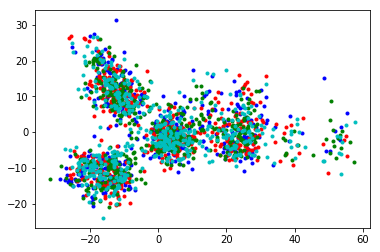

In [32]:
color = {1:'.b',2:'.r',3:'.g',4:'.c'}
for index, point in enumerate(new):
    plt.plot(point[0], point[1],color[y[index]])
plt.show()

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis(n_components=4)

In [34]:
clf.fit(x,y)

LinearDiscriminantAnalysis(n_components=4, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [36]:
new_LDA=clf.transform(x)

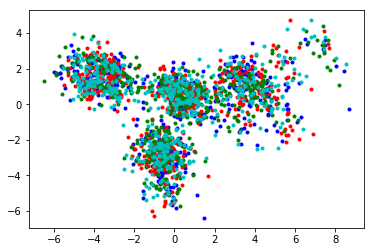

In [37]:
color = {1:'.b',2:'.r',3:'.g',4:'.c'}
for index, point in enumerate(new_LDA):
    plt.plot(point[0], point[1],color[y[index]])
plt.show()

In [42]:
clf.explained_variance_ratio_

array([0.68996521, 0.28911039, 0.02092439])